In [1]:
import numpy as np
import pandas as pd
import librosa
from librosa.display import waveplot,specshow
from IPython.display import Audio

import os
import sys

import pickle

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

from keras.callbacks import ReduceLROnPlateau,ModelCheckpoint
from keras.models import Sequential
from keras.layers import *

In [2]:
SAVEE = "../input/surrey-audiovisual-expressed-emotion-savee/ALL/"
dir_list = os.listdir(SAVEE)

emotion=[]
path = []
for i in dir_list:
    if i[-8:-6]=='_a':
        emotion.append('Angry')
    elif i[-8:-6]=='_d':
        emotion.append('Disgust')
    elif i[-8:-6]=='_f':
        emotion.append('Fear')
    elif i[-8:-6]=='_h':
        emotion.append('Happy')
    elif i[-8:-6]=='_n':
        emotion.append('Neutral')
    elif i[-8:-6]=='sa':
        emotion.append('Sad')
    elif i[-8:-6]=='su':
        emotion.append('Surprise')
    else:
        emotion.append('Error') 
    path.append(SAVEE + i)

SAVEE_df = pd.DataFrame(emotion, columns = ['Emotions'])
SAVEE_df = pd.concat([SAVEE_df, pd.DataFrame(path, columns = ['Path'])], axis = 1)

In [3]:
SAVEE_df.head()

,Emotions,Path
0,Happy,../input/surrey-audiovisual-expressed-emotion-...
1,Fear,../input/surrey-audiovisual-expressed-emotion-...
2,Happy,../input/surrey-audiovisual-expressed-emotion-...
3,Disgust,../input/surrey-audiovisual-expressed-emotion-...
4,Angry,../input/surrey-audiovisual-expressed-emotion-...


In [4]:
crem = "../input/cremad/AudioWAV"
dirc = os.listdir(crem)
feelings = []
file_path = []
for i in dirc:
    file = i.split('.')[0]
    path = crem+"/"+i
    if(file[9:12] == "ANG"):
        feelings.append("Angry")
        file_path.append(path)
    elif(file[9:12] == "DIS"):
        feelings.append("Disgust")
        file_path.append(path)
    elif(file[9:12] == "FEA"):
        feelings.append("Fear")
        file_path.append(path)
    elif(file[9:12] == "HAP"):
        feelings.append("Happy")
        file_path.append(path)
    elif(file[9:12] == "NEU"):
        feelings.append("Neutral")
        file_path.append(path)
    elif(file[9:12] == "SAD"):
        feelings.append("Sad")
        file_path.append(path)

cremed_df = pd.DataFrame()
cremed_df['Emotions'] = feelings
cremed_df['Path'] = file_path

In [5]:
rav = "../input/ravdess-emotional-speech-audio/audio_speech_actors_01-24/"

feelings = []
file_path = []
for i in os.listdir(rav):
    for j in os.listdir(rav +i):
        filepath = rav+"/" + i +"/"+ j
        file = j.split(".")[0]
        em= file.split('-')[2]
        file_path.append(filepath)
        feelings.append(int(em))
rav_df = pd.DataFrame(feelings , columns = ['Emotions'])
rav_df['Path'] = file_path
rav_df.Emotions.replace({1:'Neutral', 2:'Calm', 3:'Happy', 4:'Sad', 5:'Angry', 6:'Fear', 7:'Disgust', 8:'Surprise'}, inplace=True)

In [6]:
tes = "../input/toronto-emotional-speech-set-tess/tess toronto emotional speech set data/TESS Toronto emotional speech set data/"
feelings = []
file_path = []
for i in os.listdir(tes):
    for j in os.listdir(tes + i):
        path = tes + i +"/" + j
        feeling = i.split("_")[1]
        feelings.append(feeling)
        file_path.append(path)
        
tess_df = pd.DataFrame(feelings , columns = ['Emotions'])
tess_df['Path'] = file_path
tess_df.Emotions.replace({'neutral':'Neutral','fear' : "Fear",'sad':'Sad','disgust':'Disgust',"pleasant":'Pleasant','happy':'Happy','angry':'Angry'}, inplace=True)

In [7]:
df = pd.concat([cremed_df,rav_df,tess_df ,SAVEE_df ],axis=0)
df.reset_index()
df.head()

,Emotions,Path
0,Disgust,../input/cremad/AudioWAV/1028_TSI_DIS_XX.wav
1,Happy,../input/cremad/AudioWAV/1075_IEO_HAP_LO.wav
2,Happy,../input/cremad/AudioWAV/1084_ITS_HAP_XX.wav
3,Disgust,../input/cremad/AudioWAV/1067_IWW_DIS_XX.wav
4,Disgust,../input/cremad/AudioWAV/1066_TIE_DIS_XX.wav


In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
df.Emotions.unique()

array(['Disgust', 'Happy', 'Sad', 'Neutral', 'Fear', 'Angry', 'Surprise',
       'Calm', 'Pleasant'], dtype=object)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Emotions', ylabel='count'>

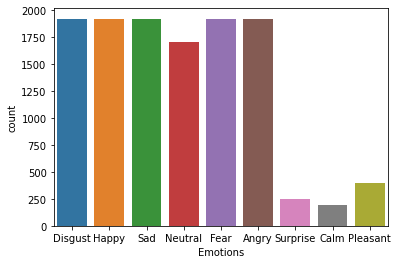

In [9]:
sns.countplot(df.Emotions)

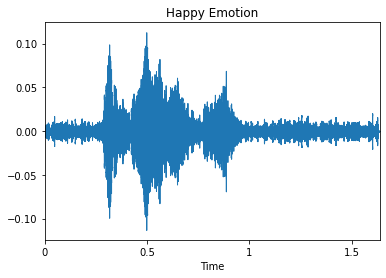

In [10]:
emotion,filepath = df.iloc[1,0:2]
data,sampling_rate = librosa.load(filepath)
plt.title("{} Emotion".format(emotion))
waveplot(data,sr=sampling_rate)
Audio(filepath)

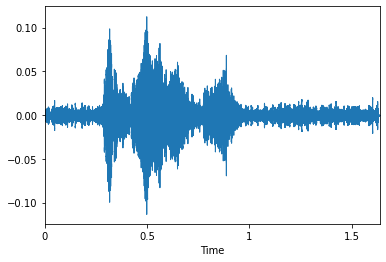

In [11]:
ads,_ = librosa.effects.trim(data)
waveplot(ads,sr = sampling_rate)

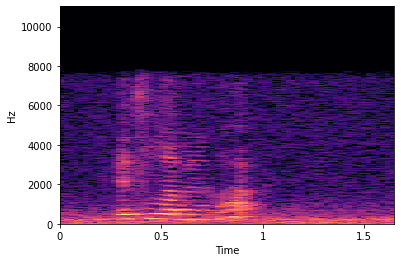

In [12]:
data_ = librosa.stft(data)
data_ = librosa.amplitude_to_db(abs(data_))
specshow(data_, sr=sampling_rate, x_axis='time', y_axis='hz')

In [13]:
def noise(data):
    wn = np.random.randn(len(data))
    data_wn = data + 0.005*wn
    return data_wn

In [14]:
new_data = noise(data)
Audio(filepath)

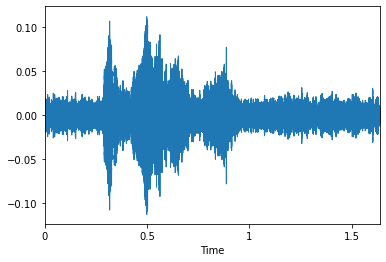

In [15]:
Audio(new_data,rate = sampling_rate)
waveplot(new_data,sr=sampling_rate)

In [16]:
def pitch(data, sampling_rate, pitch_factor=0.7):
    return librosa.effects.pitch_shift(data, sampling_rate, pitch_factor)

In [17]:
def shifting(data):
    shift_range = int(np.random.uniform(low=-5, high = 5)*1000)
    return np.roll(data, shift_range)

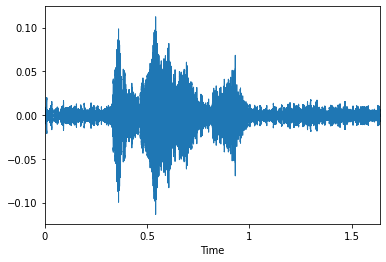

In [18]:
data1 = shifting(data)
waveplot(data1,sr = sampling_rate)
Audio(data1,rate=sampling_rate)

In [19]:
def stretch(data,rate= 1):
    return librosa.effects.time_stretch(data, rate)

In [20]:
data2 = stretch(data,0.8)
Audio(data2,rate=sampling_rate)

In [21]:
def extract_features(data,sample_rate):
    # ZCR
    result = np.array([])
    zcr = np.mean(librosa.feature.zero_crossing_rate(y=data).T, axis=0)
    result=np.hstack((result, zcr)) # stacking horizontally

    # Chroma_stft
    stft = np.abs(librosa.stft(data))
    chroma_stft = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T, axis=0)
    result = np.hstack((result, chroma_stft)) # stacking horizontally

    # MFCC
    mfcc = np.mean(librosa.feature.mfcc(y=data, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mfcc)) # stacking horizontally

    # Root Mean Square Value
    rms = np.mean(librosa.feature.rms(y=data).T, axis=0)
    result = np.hstack((result, rms)) # stacking horizontally
    
    #spectral centroid
    sc = np.mean(librosa.feature.spectral_centroid(y=data,sr = sample_rate).T , axis=0)
    result = np.hstack((result,sc)) # stacking horizontally

    # MelSpectogram
    mel = np.mean(librosa.feature.melspectrogram(y=data, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mel)) # stacking horizontally
    
    return result

def get_features(path):
    data, sample_rate = librosa.load(path, duration=2.5, offset=0.6)
    
    res1 = extract_features(data,sample_rate)
    result = np.array(res1)
    
    # data with noise
    noise_data = noise(data)
    res2 = extract_features(noise_data,sample_rate)
    result = np.vstack((result, res2)) # stacking vertically
    
    #data with shift in frequency
    shift_data = shifting(data)
    res3 = extract_features(shift_data,sample_rate)
    result = np.vstack((result,res3))
    
    # stretching and pitching data
    new_data = stretch(data)
    data_stretch_pitch = pitch(new_data, sample_rate)
    res4 = extract_features(data_stretch_pitch,sample_rate)
    result = np.vstack((result, res4)) # stacking vertically
    
    return result

In [22]:
X, Y = [], []
for path, emotion in zip(df.Path, df.Emotions):
    feature = get_features(path)
    for ele in feature:
        X.append(ele)
        # appending emotion 3 times as we have made 3 augmentation techniques on each audio file.
        Y.append(emotion)

/opt/conda/lib/python3.7/site-packages/librosa/core/pitch.py:153: UserWarning: Trying to estimate tuning from empty frequency set.
  warnings.warn("Trying to estimate tuning from empty frequency set.")


In [23]:
df_new = pd.DataFrame(X)
df_new['labels'] = Y
df_new.to_csv('features.csv', index=False)
df_new.head()

,0,1,2,3,4,5,6,7,8,9,...,154,155,156,157,158,159,160,161,162,labels
0,0.104272,0.564816,0.612396,0.638452,0.650612,0.678710,0.708490,0.625384,0.655605,0.711051,...,4.282587e-08,3.654240e-08,3.209874e-08,2.881007e-08,2.634938e-08,2.452826e-08,2.319282e-08,2.228679e-08,2.174088e-08,Disgust
1,0.259387,0.765260,0.808739,0.831780,0.835123,0.871878,0.757929,0.699917,0.733380,0.785653,...,1.880085e-03,1.767167e-03,1.668857e-03,1.789056e-03,1.734005e-03,1.794528e-03,1.811535e-03,1.821999e-03,1.853032e-03,Disgust
2,0.105170,0.576010,0.613286,0.642918,0.653298,0.679842,0.712732,0.632801,0.656812,0.711752,...,3.334532e-08,3.104830e-08,2.925751e-08,2.780842e-08,2.664515e-08,2.574551e-08,2.505325e-08,2.457617e-08,2.427589e-08,Disgust
3,0.106873,0.587729,0.600084,0.666650,0.630940,0.671559,0.730190,0.674302,0.676479,0.691988,...,7.232946e-08,6.127318e-08,5.432573e-08,5.005201e-08,4.782668e-08,4.840171e-08,5.895594e-08,8.517488e-08,1.047155e-07,Disgust
4,0.040527,0.623791,0.634216,0.568277,0.564587,0.632806,0.711795,0.717809,0.703159,0.683756,...,1.614991e-07,1.501551e-07,1.409092e-07,1.331978e-07,1.268739e-07,1.218927e-07,1.180271e-07,1.153270e-07,1.136355e-07,Happy


In [24]:
X = df_new.iloc[:,:-1].values
y = df_new.iloc[:,-1].values

In [25]:
# As this is a multiclass classification problem onehotencoding our Y.
encoder = OneHotEncoder()
Y = encoder.fit_transform(np.array(y).reshape(-1,1)).toarray()

In [26]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,random_state = 123,shuffle=True)
x_train.shape , y_train.shape , x_test.shape, y_test.shape

((36486, 163), (36486, 9), (12162, 163), (12162, 9))

In [27]:
ss = StandardScaler()
x_train = ss.fit_transform(x_train)
x_test = ss.transform(x_test)


In [28]:
x_train = np.expand_dims(x_train , axis=2)
x_test = np.expand_dims(x_test,axis=2)
x_train.shape , x_test.shape

((36486, 163, 1), (12162, 163, 1))

In [29]:
model=Sequential()
model.add(Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu', input_shape=(x_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(Conv1D(256,kernel_size=5 , strides = 1 , padding='same',activation = 'relu'))
model.add(MaxPooling1D(pool_size=5,strides=2,padding='same'))

model.add(Conv1D(128, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))
model.add(Dropout(0.3))

model.add(Conv1D(128, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))
model.add(Dropout(0.2))

model.add(Conv1D(64, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(Conv1D(64, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(Flatten())
model.add(Dense(units=32, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(units=9, activation='softmax'))
model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 163, 256)          1536      
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 82, 256)           0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 82, 256)           327936    
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 41, 256)           0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 41, 256)           327936    
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 21, 256)           0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 21, 128)           1

2022-02-19 08:53:03.596525: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-02-19 08:53:03.737185: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-02-19 08:53:03.737964: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-02-19 08:53:03.739204: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

In [30]:
lr_scheduler = ReduceLROnPlateau(monitor = 'loss',factor=0.4,verbose=0,patience=2,min_lr = 0.00001)
history = model.fit(x_train,y_train,batch_size=64,epochs=50,validation_data = (x_test,y_test),callbacks = [lr_scheduler])

2022-02-19 08:53:06.311705: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/50


2022-02-19 08:53:08.178891: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


571/571 [==============================] - 14s 12ms/step - loss: 1.7378 - accuracy: 0.3031 - val_loss: 1.4892 - val_accuracy: 0.4210
Epoch 2/50
571/571 [==============================] - 6s 11ms/step - loss: 1.4663 - accuracy: 0.4147 - val_loss: 1.3100 - val_accuracy: 0.4790
Epoch 3/50
571/571 [==============================] - 6s 11ms/step - loss: 1.3554 - accuracy: 0.4591 - val_loss: 1.2675 - val_accuracy: 0.4906
Epoch 4/50
571/571 [==============================] - 6s 11ms/step - loss: 1.2739 - accuracy: 0.4918 - val_loss: 1.2234 - val_accuracy: 0.5086
Epoch 5/50
571/571 [==============================] - 7s 11ms/step - loss: 1.2405 - accuracy: 0.5052 - val_loss: 1.1707 - val_accuracy: 0.5261
Epoch 6/50
571/571 [==============================] - 6s 11ms/step - loss: 1.2033 - accuracy: 0.5188 - val_loss: 1.1376 - val_accuracy: 0.5387
Epoch 7/50
571/571 [==============================] - 6s 11ms/step - loss: 1.1965 - accuracy: 0.5236 - val_loss: 1.1118 - val_accuracy: 0.5474
Epoch 8/5

In [31]:
model.evaluate(x_test,y_test)

381/381 [==============================] - 1s 4ms/step - loss: 0.9019 - accuracy: 0.6806


[0.9019078016281128, 0.680562436580658]

In [32]:
train_acc = history.history['accuracy']
train_loss = history.history['loss']
test_acc = history.history['val_accuracy']
test_loss = history.history['val_loss']

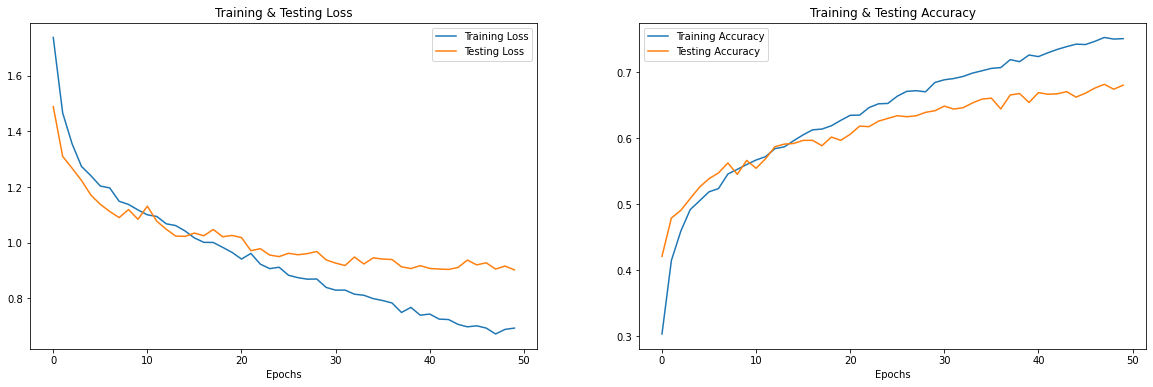

In [33]:
epochs = [i for i in range(50)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
test_acc = history.history['val_accuracy']
test_loss = history.history['val_loss']

fig.set_size_inches(20,6)
ax[0].plot(epochs , train_loss , label = 'Training Loss')
ax[0].plot(epochs , test_loss , label = 'Testing Loss')
ax[0].set_title('Training & Testing Loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")

ax[1].plot(epochs , train_acc , label = 'Training Accuracy')
ax[1].plot(epochs , test_acc , label = 'Testing Accuracy')
ax[1].set_title('Training & Testing Accuracy')
ax[1].legend()
ax[1].set_xlabel("Epochs")
plt.show()

In [34]:
pred_test = model.predict(x_test)
y_pred = encoder.inverse_transform(pred_test)

y_test = encoder.inverse_transform(y_test)

df = pd.DataFrame(columns=['Predicted Labels', 'Actual Labels'])
df['Predicted Labels'] = y_pred.flatten()
df['Actual Labels'] = y_test.flatten()

df.head(10)

,Predicted Labels,Actual Labels
0,Disgust,Disgust
1,Disgust,Happy
2,Disgust,Angry
3,Angry,Angry
4,Disgust,Disgust
5,Happy,Angry
6,Neutral,Sad
7,Sad,Sad
8,Fear,Happy
9,Happy,Happy


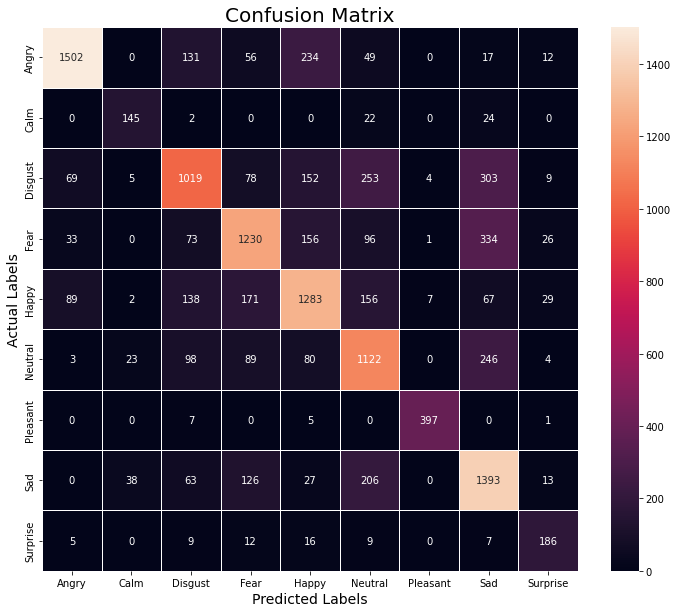

In [35]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (12, 10))
cm = pd.DataFrame(cm , index = [i for i in encoder.categories_] , columns = [i for i in encoder.categories_])
sns.heatmap(cm, linecolor='white', linewidth=1, annot=True, fmt='')
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()

In [36]:
model_name = "emotion_model.h5"
model.save(model_name)